**Run the following two cells before you begin.**

In [50]:
%autosave 10

Autosaving every 10 seconds


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

**First, import the cleaned data set. Then, select the features from the DataFrame of the case study data.**
    
These features should be: `'LIMIT_BAL'`, `'EDUCATION'`, `'MARRIAGE'`, `'AGE'`, `'PAY_1'`, `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`, `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, AND `'PAY_AMT6'`.

In [52]:
# Import data set
df=pd.read_csv('cleaned_data.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [53]:
# Create features list
features=df[['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']]
features

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,1,24,2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,26,-1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,34,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,1,37,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,2,1,57,-1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,220000,3,1,39,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
26660,150000,3,2,43,-1,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
26661,30000,2,2,37,4,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
26662,80000,3,1,41,1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


_____________________________________________________
**Next, make a 80:20 train/test split using a random seed of 24.**

In [56]:

X=features
y=df['default payment next month']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)
X_train

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
6409,120000,2,2,24,0,34670,35606,27065,25948,11884,3107,2033,1200,0,0,3107,8542
4663,190000,1,1,39,2,171462,163148,165281,173231,132145,146854,0,10000,15000,10091,20000,10000
13763,420000,2,1,37,-1,3823,149793,56611,77406,79316,73995,150298,10617,25000,3034,3012,5012
7542,30000,1,2,36,2,24796,26088,27032,26723,23143,17106,2000,1804,2014,1521,1204,1500
14518,120000,3,1,37,0,19821,20836,23562,22890,23189,23521,1651,3377,0,976,855,1011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19857,180000,2,1,30,-2,5100,9861,11021,16883,150,4661,9861,11021,16883,150,4661,873
24919,100000,1,2,28,0,10886,11697,14479,10775,10998,12655,1300,3005,0,700,2000,1500
14528,30000,2,1,43,2,15780,15246,17838,17272,18131,17711,0,3141,0,1434,0,1581
899,150000,3,2,30,-2,456,9664,3420,2527,0,0,9664,3420,2612,0,0,0


_____________________________________________________
**Then, instantiate the `MinMaxScaler` to scale the data.**

In [57]:
X_train=np.array(X_train)
y_train=np.array(y_train)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train

array([[1.39240506e-01, 3.33333333e-01, 6.66666667e-01, ...,
        0.00000000e+00, 7.43319218e-03, 1.61576496e-02],
       [2.27848101e-01, 0.00000000e+00, 3.33333333e-01, ...,
        1.90793292e-02, 4.78480346e-02, 1.89155346e-02],
       [5.18987342e-01, 3.33333333e-01, 3.33333333e-01, ...,
        5.73646665e-03, 7.20591402e-03, 9.48046593e-03],
       ...,
       [2.53164557e-02, 3.33333333e-01, 3.33333333e-01, ...,
        2.71130296e-03, 0.00000000e+00, 2.99054602e-03],
       [1.77215190e-01, 6.66666667e-01, 6.66666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.43037975e-01, 0.00000000e+00, 6.66666667e-01, ...,
        4.84404336e-03, 3.11012225e-05, 5.65385328e-03]])

_____________________________________________________
**Next, instantiate a logistic regression model with the `saga` solver, L1 penalty, and set `max_iter` to 1,000 as we want the solver to have enough iterations to find a good solution.**

In [58]:
my_lr=LogisticRegression(solver='saga',penalty='l1',max_iter=1000)


_____________________________________________________
**Next, import the `Pipeline` class and create a `Pipeline` with the scaler and the logistic regression model, using the names `'scaler'` and `'model'` for the steps, respectively.**

In [59]:
from sklearn.pipeline import Pipeline
scale_pipeline=Pipeline(steps=[('scaler',scaler),('model',my_lr)])

_____________________________________________________
**Now, use the `get_params` method to view the parameters from each stage of the pipeline.**

In [60]:
# Use `get_params`
scale_pipeline.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)>

**Use the `set_params` method to change the the `model__C` parameter to 2.**

In [61]:
# View what `model__C` is set to currently
scale_pipeline.get_params()['model__C']

1.0

In [62]:
# Change `model__C` to 2
scale_pipeline.set_params(model__C=2)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=2, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

_____________________________________________________
**Then, create a smaller range of C values to test with cross-validation, as these models will take longer to train and test with more data than our previous activities.**

**Use C_vals = [$10^2$, $10$, $1$, $10^{-1}$, $10^{-2}$, $10^{-3}$].**


<details>
    <summary>Hint:</summary>
    Recall that exponents in Python use the ** operator.
</details>

In [63]:
C_vals=[10**2,10,1,0.1,0.01,0.001]

Now, define `k_folds` using `StratifiedKFold`. The number of folds should be 4. Set the random state to 1.

In [64]:
k_folds=StratifiedKFold(n_splits=4,random_state=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


_____________________________________________________
**Next, make a new version of the `cross_val_C_search` function, called `cross_val_C_search_pipe`. Instead of the model argument, this function will take a pipeline argument. The changes inside the function will be to set the `C` value using `set_params(model__C = <value you want to test>)` on the pipeline, replacing the model with the pipeline for the fit and `predict_proba` methods, and accessing the `C` value using `pipeline.get_params()['model__C']` for the printed status update.**

In [65]:
def cross_val_C_search_pipe(scale_pipe,k_folds,C_vals,X,Y):
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    
    cv_test_roc = [[]]*len(C_vals)
    
    for c_val_counter in range(len(C_vals)):
        scale_pipeline.set_params(model__C=C_vals[c_val_counter])
        fold_counter = 0
        for train_index, test_index in k_folds.split(X, Y):
            x_train, x_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            
            scale_pipeline.fit(x_train, y_train)
            
            y_train_predict_proba = scale_pipeline.predict_proba(x_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_train, y_train_predict_proba[:,1])
            
            y_test_predict_proba = scale_pipeline.predict_proba(x_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_test, y_test_predict_proba[:,1])
            
            this_fold_roc = roc_curve(y_test, y_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)
    
            fold_counter += 1
        
            print('Done with C = {}'.format(C_vals[c_val_counter]))
            
    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc,n_folds

_____________________________________________________
**Now, run this function as in the previous activity, but using the new range of `C` values, the pipeline you created, and the features and response variable from the training split of the case study data.**

    You may see warnings here, or in later steps, about the non-convergence of the solver; you could experiment with the `tol` or `max_iter`` options to try and achieve convergence, although the results you obtain with `max_iter = 1000` are likely to be sufficient.

In [66]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc,n_folds=cross_val_C_search_pipe(scale_pipeline,k_folds,C_vals,X_train,y_train)

Done with C = 100
Done with C = 100
Done with C = 100
Done with C = 100
Done with C = 10
Done with C = 10
Done with C = 10
Done with C = 10
Done with C = 1
Done with C = 1
Done with C = 1
Done with C = 1
Done with C = 0.1
Done with C = 0.1
Done with C = 0.1
Done with C = 0.1
Done with C = 0.01
Done with C = 0.01
Done with C = 0.01
Done with C = 0.01
Done with C = 0.001
Done with C = 0.001
Done with C = 0.001
Done with C = 0.001


_____________________________________________________
**Plot the average training and testing ROC AUC across folds, for each `np.log(C_vals)` value.**

In [67]:
cv_train_roc_auc

array([[0.72034543, 0.72006808, 0.71855693, 0.71721256, 0.71860157,
        0.5       ],
       [0.72145236, 0.72126153, 0.71952921, 0.71553695, 0.71598412,
        0.5       ],
       [0.71461026, 0.71438437, 0.71268283, 0.70980993, 0.71071684,
        0.5       ],
       [0.72320927, 0.72307604, 0.72165044, 0.71947642, 0.72051993,
        0.5       ]])

Text(0.5, 1.0, 'Cross validation scores for each fold')

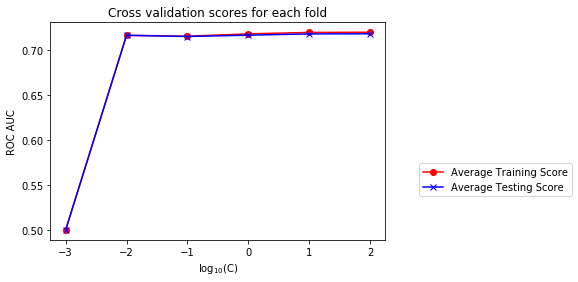

In [68]:
plt.plot(np.log10(C_vals), np.mean(cv_train_roc_auc,axis=0), '-o',
            color='red', label='Average Training Score')
plt.plot(np.log10(C_vals), np.mean(cv_test_roc_auc,axis=0), '-x',
             color='blue', label='Average Testing Score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend(loc = [1.1, 0.2])
plt.title('Cross validation scores for each fold')

_____________________________________________________
**Up next, create interaction features for the case study data using scikit-learn's `PolynomialFeatures`. You should use 2 as the degree of polynomial features. Confirm that the number of new features makes sense.**

In [69]:

from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(interaction_only=True, include_bias=False)
pf.fit_transform(X)

array([[2.00000000e+04, 2.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20000000e+05, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 2.00000000e+06, 0.00000000e+00],
       [9.00000000e+04, 2.00000000e+00, 2.00000000e+00, ...,
        1.00000000e+06, 5.00000000e+06, 5.00000000e+06],
       ...,
       [3.00000000e+04, 2.00000000e+00, 2.00000000e+00, ...,
        8.40000000e+06, 1.30200000e+07, 6.20000000e+06],
       [8.00000000e+04, 3.00000000e+00, 1.00000000e+00, ...,
        1.02008664e+08, 3.47450400e+06, 9.55470560e+07],
       [5.00000000e+04, 2.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+06, 1.00000000e+06, 1.00000000e+06]])

_____________________________________________________
**Finally, repeat the cross-validation procedure and observe the model performance now.**

In [76]:
# Using the new features, make a 80:20 train/test split using a random seed of 24.**
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=24)
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)

In [77]:
# Call the cross_val_C_search_pipe() function using the new training data.
# All other parameters should remain the same.
# Note that this training may take a few minutes due to the larger number of features.
cv_train_roc_auc2, cv_test_roc_auc2, cv_test_roc2,n_folds2=cross_val_C_search_pipe(scale_pipeline,k_folds,C_vals,xtrain,ytrain)

Done with C = 100
Done with C = 100
Done with C = 100
Done with C = 100
Done with C = 10
Done with C = 10
Done with C = 10
Done with C = 10
Done with C = 1
Done with C = 1
Done with C = 1
Done with C = 1
Done with C = 0.1
Done with C = 0.1
Done with C = 0.1
Done with C = 0.1
Done with C = 0.01
Done with C = 0.01
Done with C = 0.01
Done with C = 0.01
Done with C = 0.001
Done with C = 0.001
Done with C = 0.001
Done with C = 0.001


Text(0.5, 1.0, 'Cross validation scores for each fold')

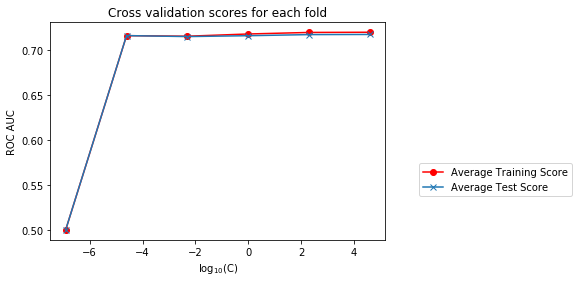

In [79]:


# Plot the average training and testing ROC AUC across folds, for each C value.
plt.plot(np.log(C_vals), np.mean(cv_train_roc_auc2,axis=0), '-o',
         color='red', label='Average Training Score')
plt.plot(np.log(C_vals), np.mean(cv_test_roc_auc2,axis=0), '-x',
          label='Average Test Score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend(loc = [1.1, 0.2])
plt.title('Cross validation scores for each fold')



**Take a look at the above graph. Does the average cross-validation testing performance improve with the interaction features? Is regularization useful?**